<a href="https://colab.research.google.com/github/SauravChandra10/DataAnalysisNotebooks/blob/main/creditCardCustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
customers = pd.read_csv('/content/drive/MyDrive/Datasets/customer_segmentation.csv')

In [3]:
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

1. No null data found
2. gender, education_level, and marital_status are object types, and need to be converted accordingly.

In [8]:
customers['gender'].value_counts()

,count
gender,
F,5358
M,4769


In [9]:
customers['education_level'].value_counts()

,count
education_level,
Graduate,3685
High School,2351
Uneducated,1755
College,1192
Post-Graduate,616
Doctorate,528


In [10]:
customers['marital_status'].value_counts()

,count
marital_status,
Married,4687
Single,3943
Unknown,749
Divorced,748


In [11]:
customers.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


1. No column has huge difference in mean and median(50%)

<ipython-input-12-d5d767247676>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  customers.drop('customer_id', axis=1).hist(ax=ax)


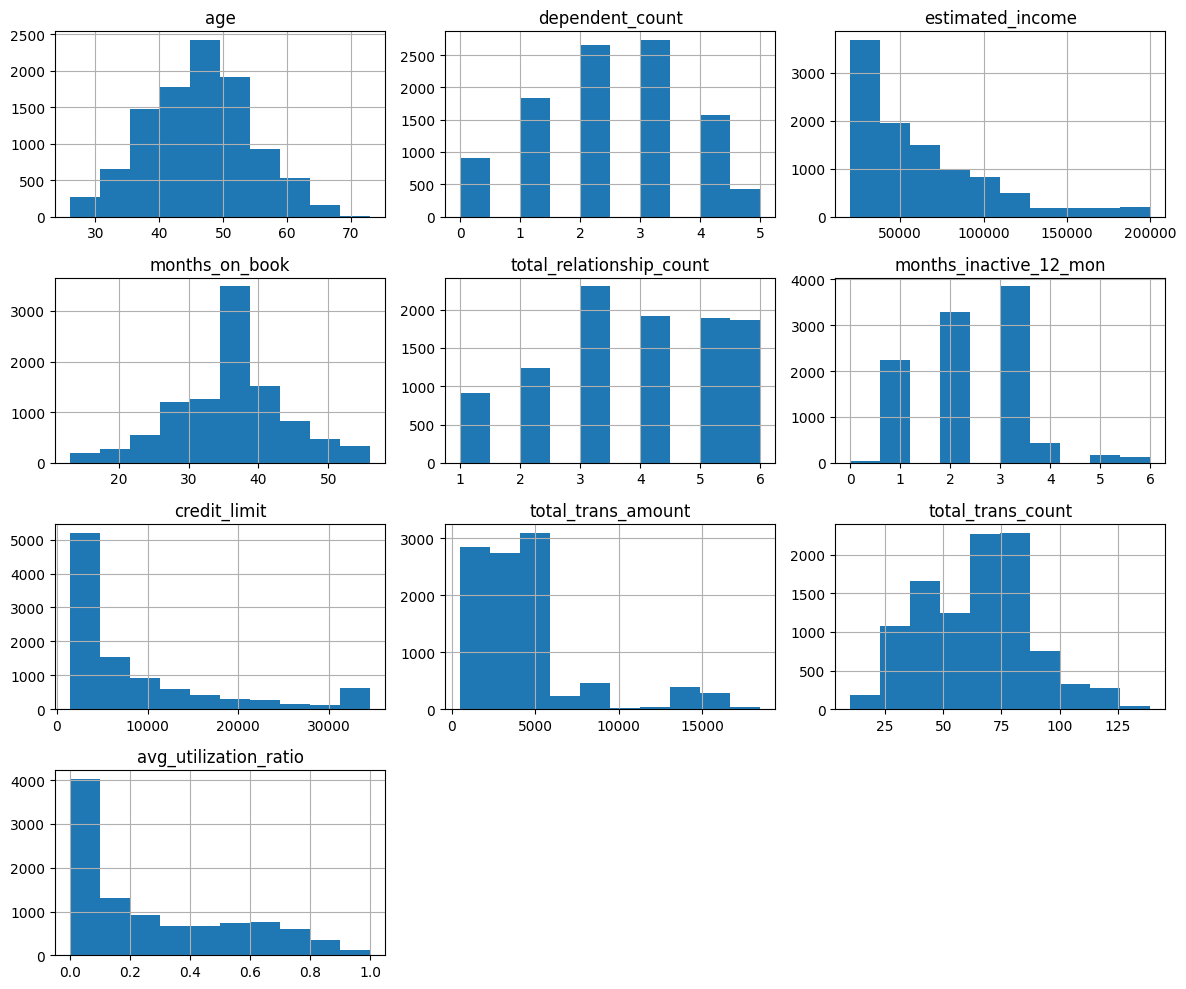

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))

#Removing the customer's id before plotting the distributions
customers.drop('customer_id', axis=1).hist(ax=ax)

plt.tight_layout()
plt.show()

1. Some columns like estimated_income, credit_limit, total_trans_amount, and avg_utilization_ratio seem to be skewed.

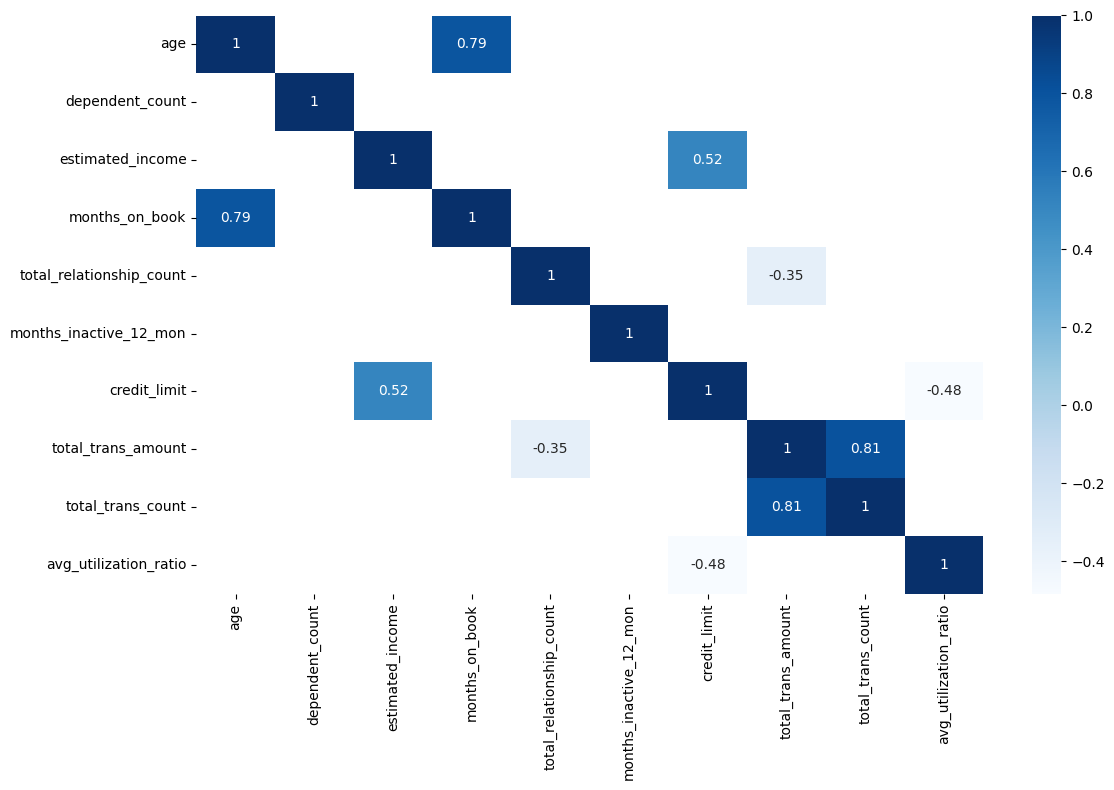

In [14]:
correlations = customers.drop('customer_id', axis=1).corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(correlations[(correlations > 0.30) | (correlations < -0.30)], cmap='Blues', annot=True, ax=ax)

plt.tight_layout()
plt.show()

1. age and months_on_book -> the longer the age, the longer the relationship with the bank
2. estimated_income and credit_limit -> more estimated income should result in more credit_limit
3. total_relationship_count and total_trans_amount -> novel discovery, indicates that more people who contact the bank have lower transaction amounts.
4. credit_limit and avg_utilization_ratio -> seems logical; those with less limit will spend more as a percentage of their limit.

In [15]:
customers_modif = customers.copy()

customers_modif['gender'] = customers['gender'].apply(lambda x: 1 if x == 'M' else 0)
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [16]:
education_mapping = {'Uneducated': 0, 'High School': 1, 'College': 2,
                     'Graduate': 3, 'Post-Graduate': 4, 'Doctorate': 5}
customers_modif['education_level'] = customers_modif['education_level'].map(education_mapping)

customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,1,3,1,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,0,5,3,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,1,3,3,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,0,4,1,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,1,3,0,Married,65000,21,5,1,4716.0,816,28,0.000


In [18]:
dummies = pd.get_dummies(customers_modif[['marital_status']], prefix='marital', drop_first=True)

customers_modif = pd.concat([customers_modif, dummies], axis=1)
customers_modif.drop(['marital_status'], axis=1, inplace=True)

print(customers_modif.info())
customers_modif.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  int64  
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  int64  
 5   estimated_income          10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
 13  marital_Married           10127 non-null  bool   
 14  marita

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_Married,marital_Single,marital_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,True,False,False
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,False,True,False
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,True,False,False
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,False,False,True
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,True,False,False


In [19]:
X = customers_modif.drop('customer_id', axis=1)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

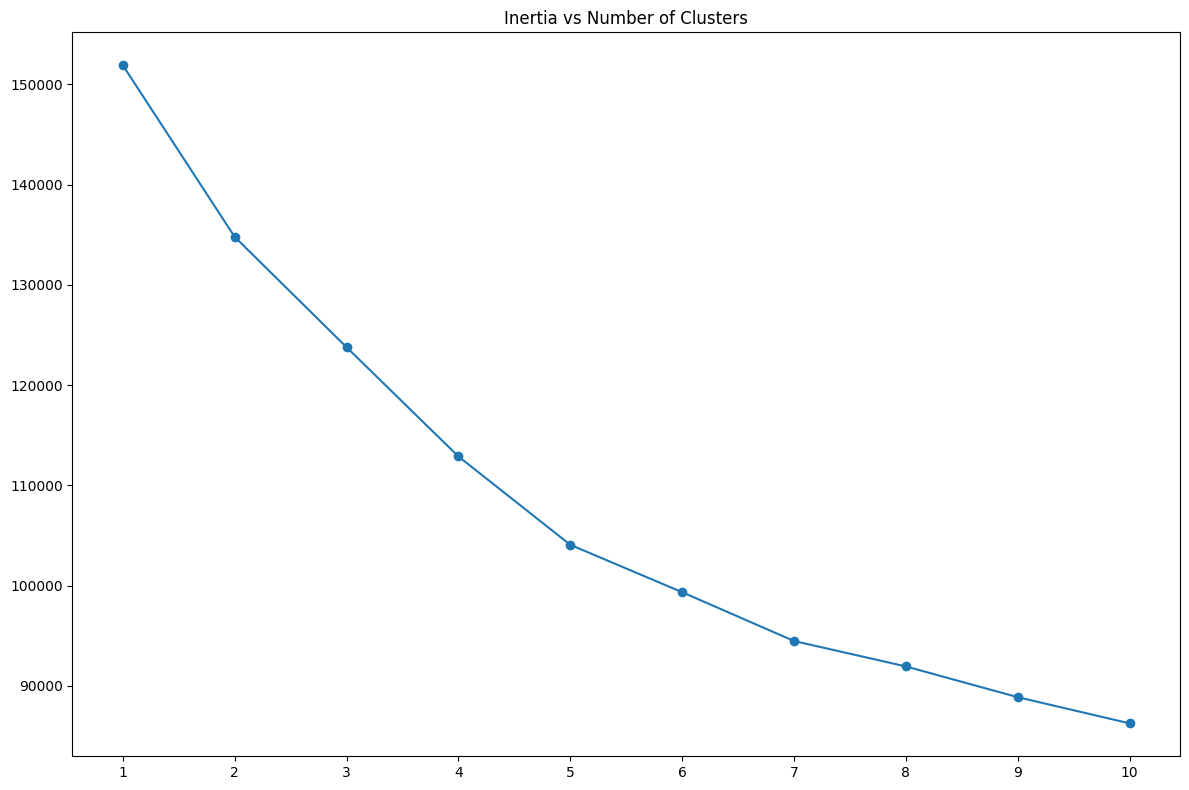

In [26]:
X = pd.DataFrame(X_scaled)
inertias = []

for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=69)
    y = model.fit_predict(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()

In [27]:
model = KMeans(n_clusters=5)
y = model.fit_predict(X_scaled)

y

array([3, 2, 3, ..., 1, 2, 1], dtype=int32)

In [29]:
customers['CLUSTER'] = y + 1
customers.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,4
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,3
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,4
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,3
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,2


In [31]:
customers['CLUSTER'].value_counts()

,count
CLUSTER,
3,2968
2,2562
4,2028
1,1576
5,993


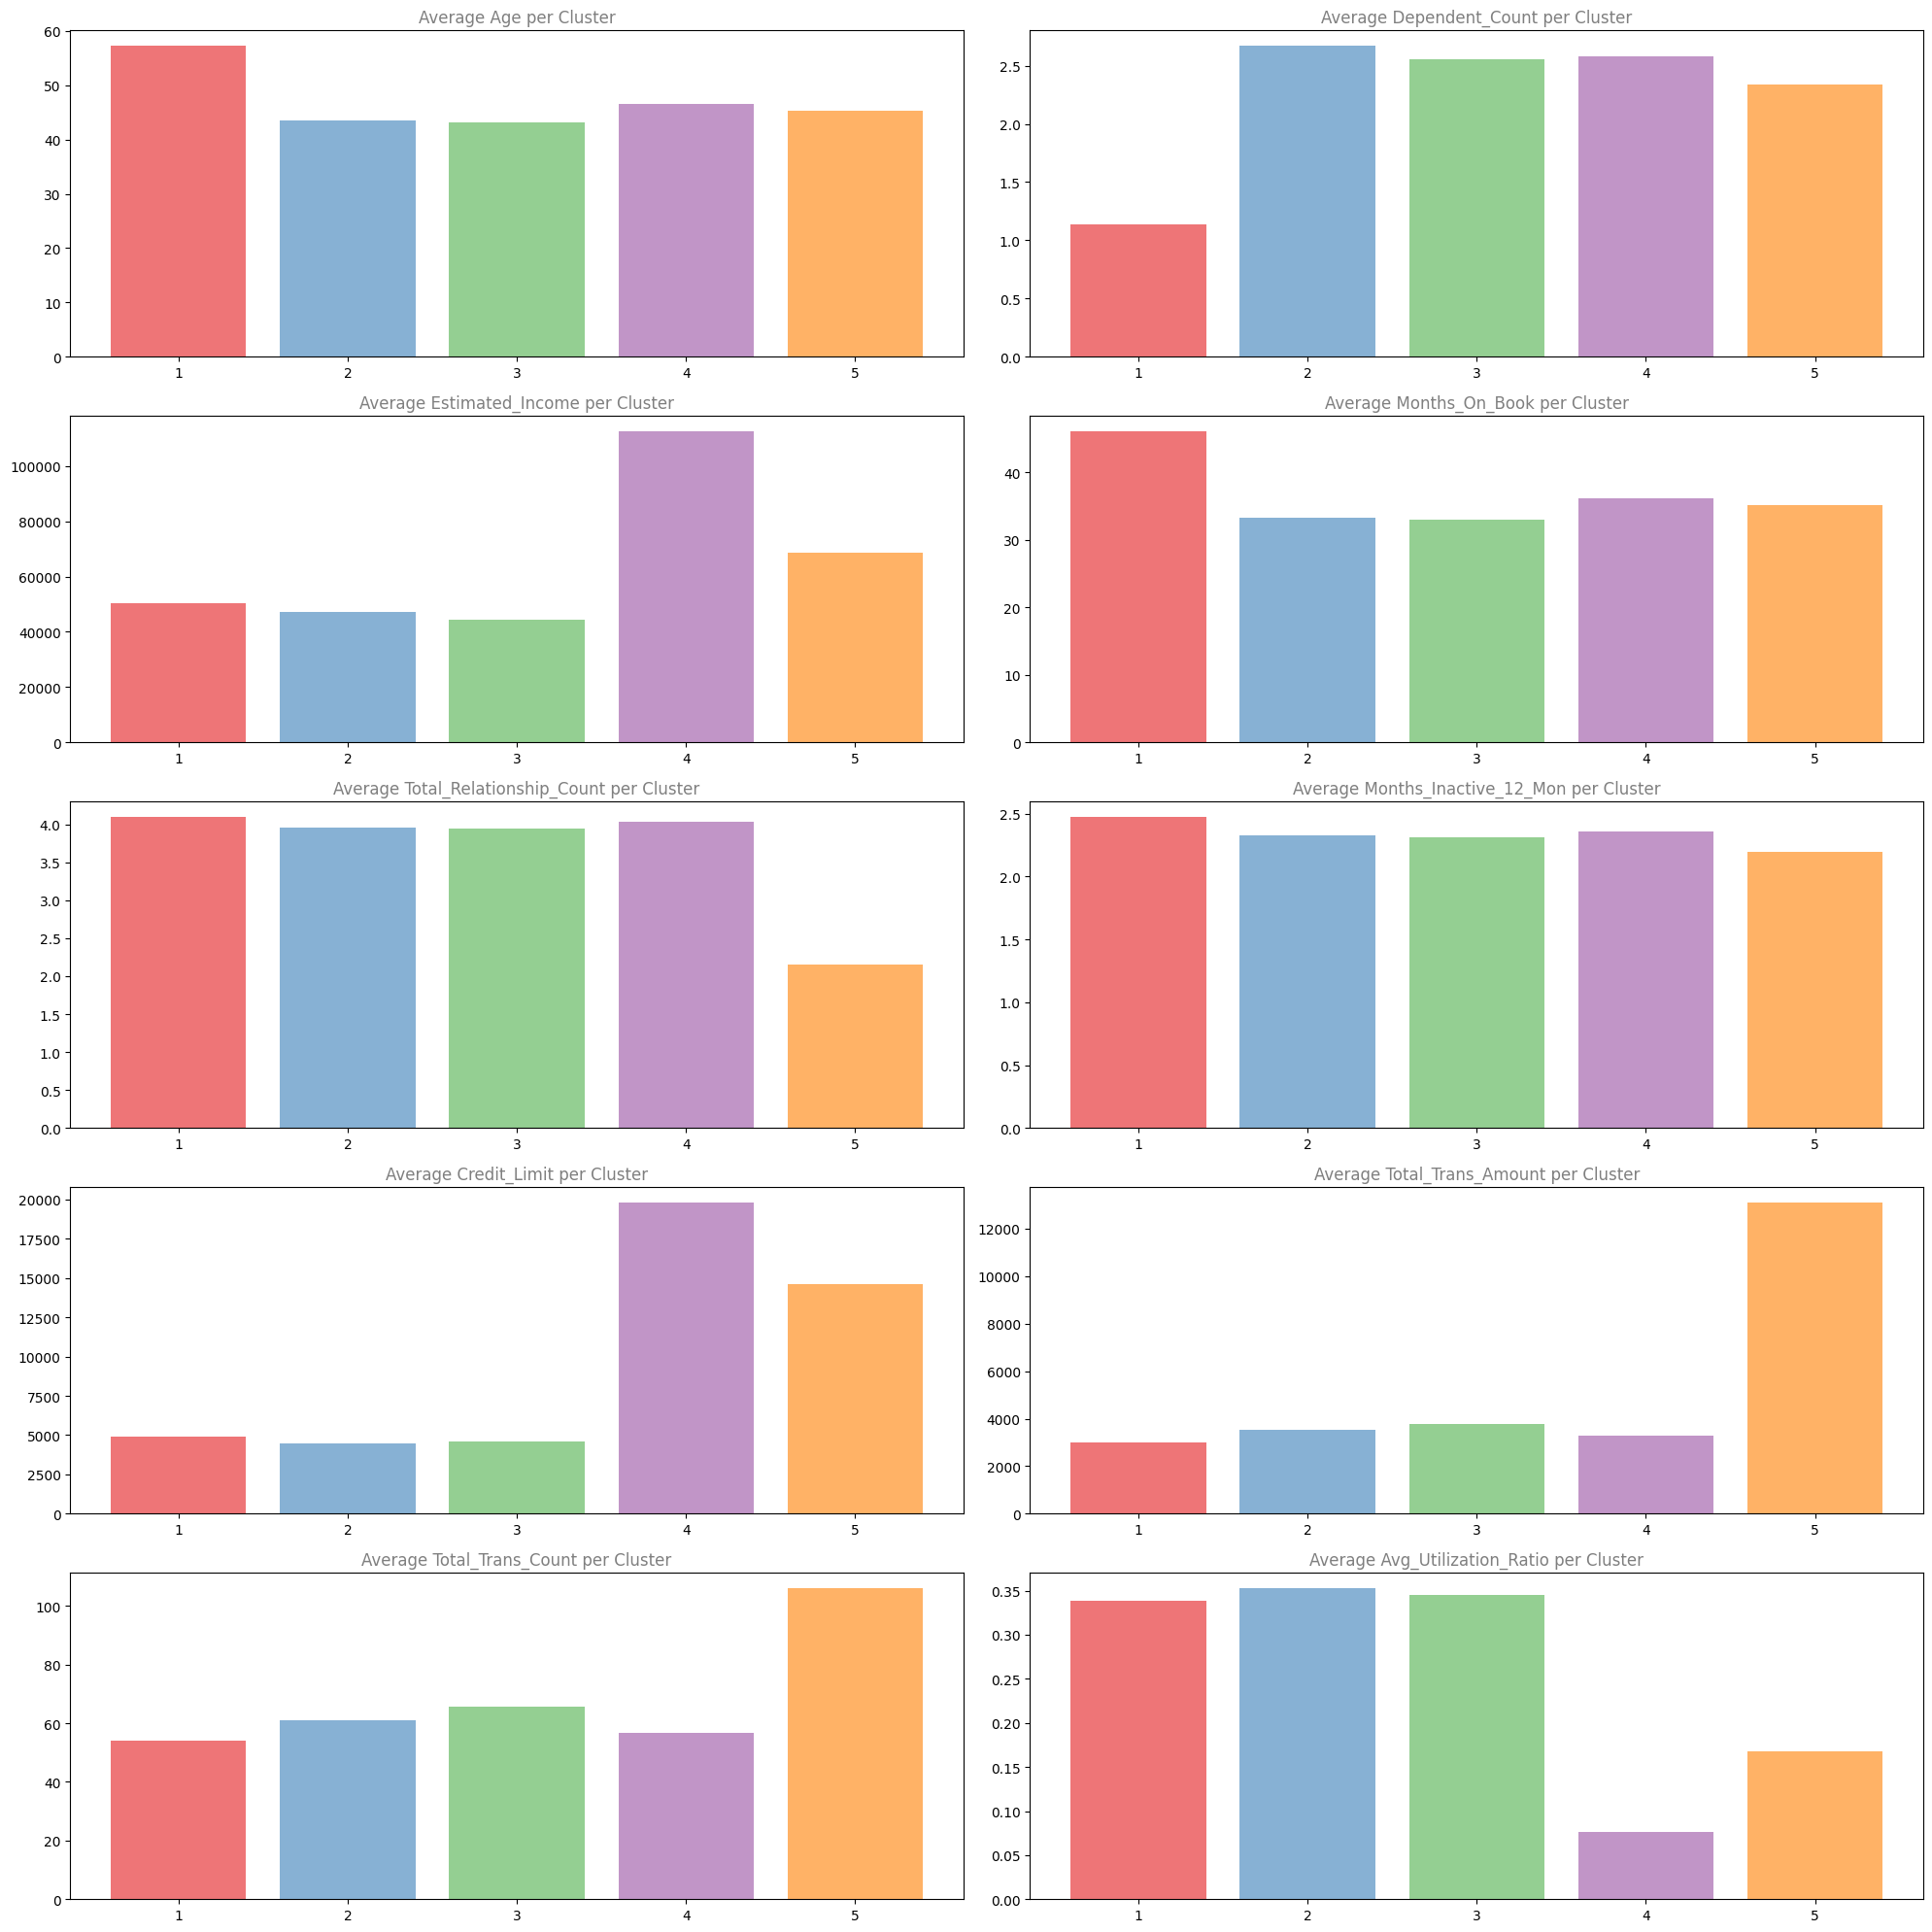

In [33]:
numeric_columns = customers.select_dtypes(include=np.number).drop(['customer_id', 'CLUSTER'], axis=1).columns

fig = plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric_columns):
    df_plot = customers.groupby('CLUSTER')[column].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)

plt.tight_layout()
plt.show()

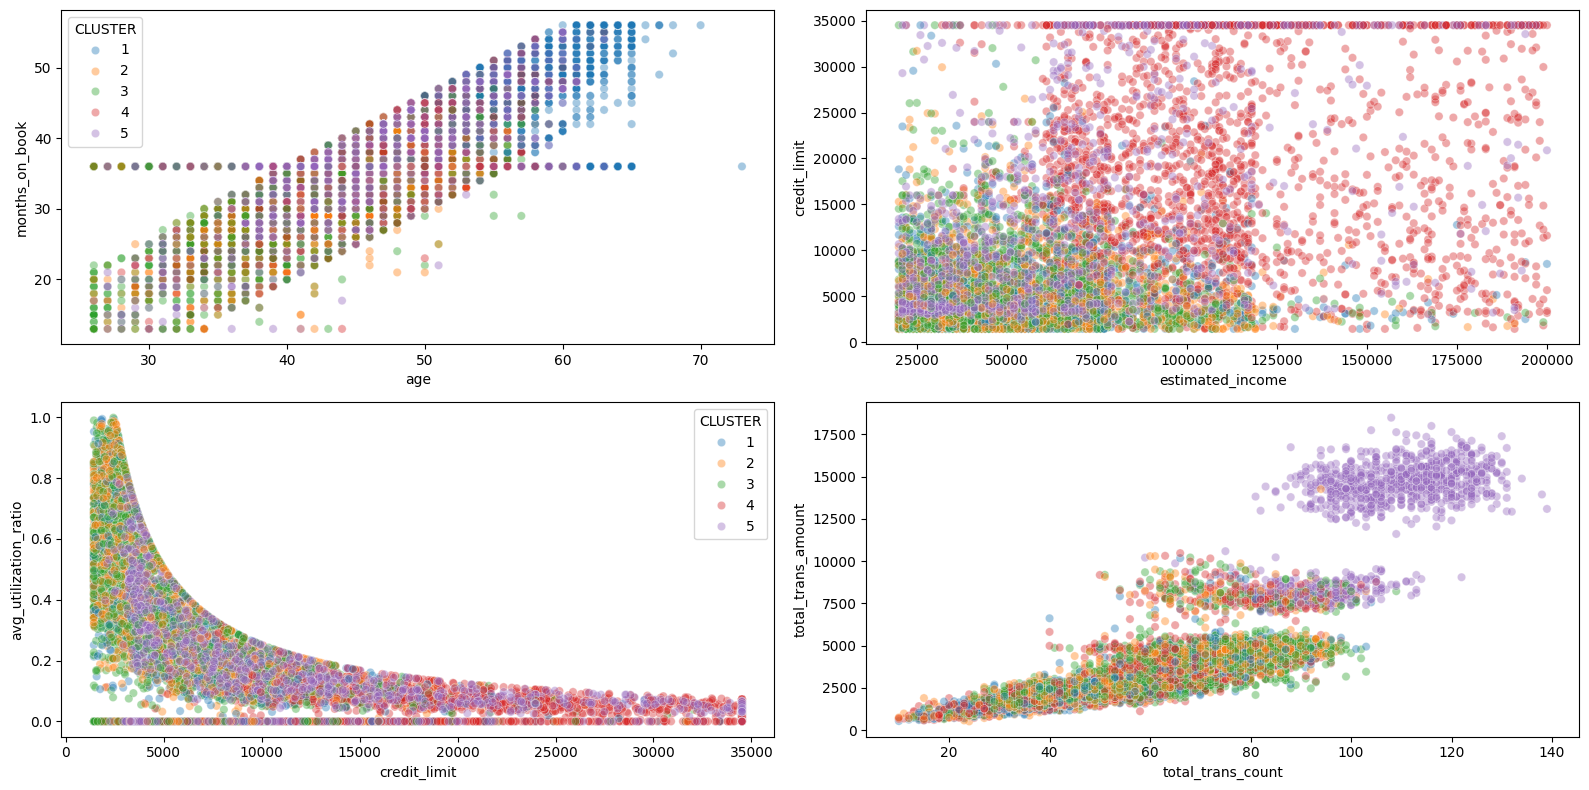

In [35]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x='age', y='months_on_book', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax2, legend=False)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='CLUSTER', data=customers, palette='tab10', alpha=0.4, ax=ax4, legend=False)

plt.tight_layout()
plt.show()

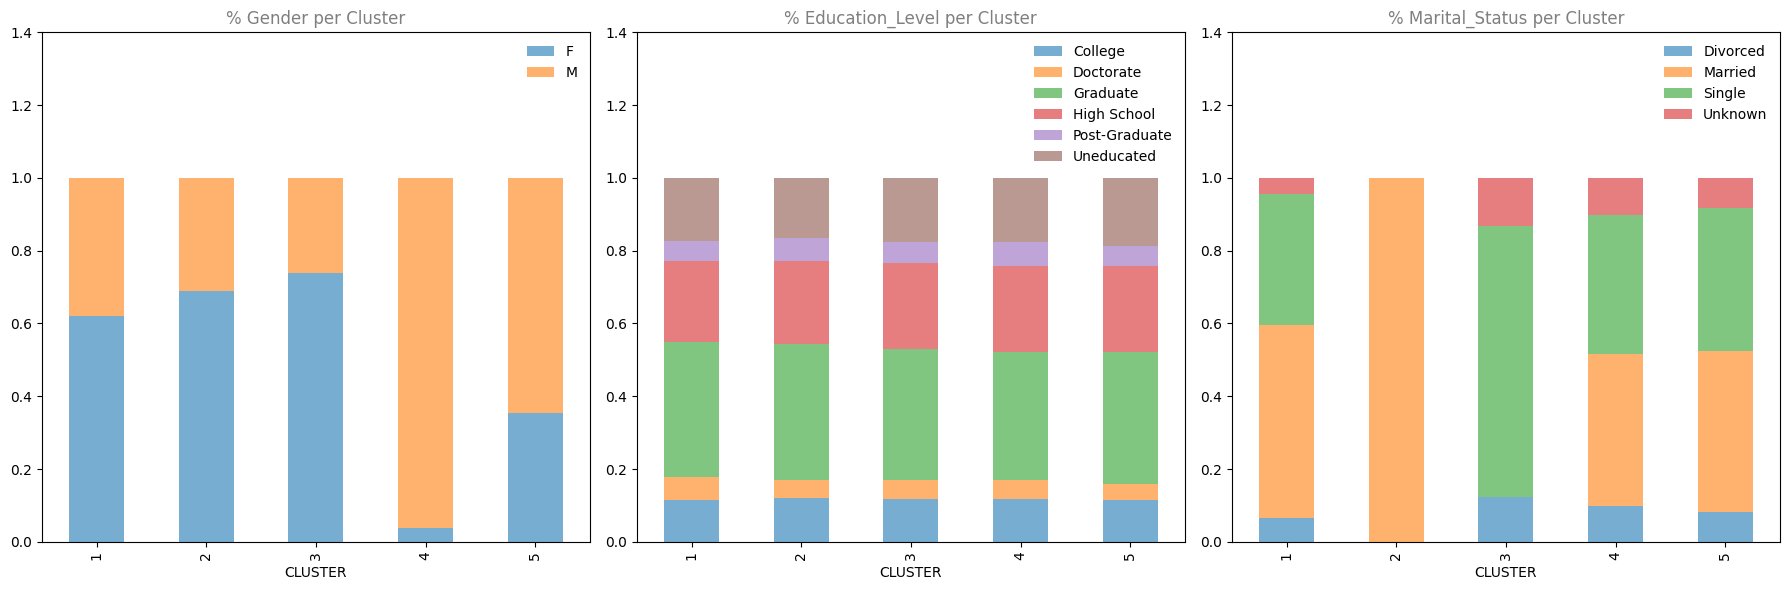

In [36]:
cat_columns = customers.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))
for i, col in enumerate(cat_columns):
    plot_customers = pd.crosstab(index=customers['CLUSTER'], columns=customers[col], values=customers[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_customers.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)

    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    # ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

# **Customer Segmentation Analysis**


## **Cluster 1: Long-Term Female Customers with Varying Credit Behavior**
- **Demographics**: Over 60% females, primarily single or married.
- **Credit Behavior**:
  - Low average credit limit.
  - Credit utilization varies from high to low across members.
- **Customer Profile**:
  - Older age group with high "Months on Book", indicating long-standing customers.
  - Low average number of dependents.
  - High relationship count, reflecting strong engagement with multiple products.
- **Business Insight**: These are loyal customers, ideal for upselling premium credit products or long-term savings plans.

## **Cluster 2: Financially Constrained Married Females**
- **Demographics**: 70% females; all customers are married.
- **Credit Behavior**:
  - Low credit limit and low estimated income.
  - High credit utilization ratio, indicating potential credit stress.
- **Customer Profile**:
  - High relationship count despite financial constraints.
- **Business Insight**: Represents financially stretched but loyal customers. Risk management strategies such as offering financial wellness programs or low-interest consolidation products could be beneficial.

## **Cluster 3: Young Single Female Segment with High Credit Dependency**
- **Demographics**: 75% females, predominantly single.
- **Credit Behavior**:
  - Low credit limit and low estimated income.
  - High credit utilization ratio, suggesting reliance on available credit.
- **Customer Profile**:
  - Generally younger, mostly below 30 years of age.
  - High relationship count, suggesting engagement across multiple banking products.
- **Business Insight**: This segment is prime for credit-building offers, first-time home loan products, or career-linked banking solutions.

## **Cluster 4: High-Income Male Customers with Strong Credit Profiles**
- **Demographics**: 95% males, majority single or married.
- **Credit Behavior**:
  - High credit limits with low credit utilization ratios.
  - High estimated income, with variability across customers.
- **Customer Profile**:
  - High relationship count with diversified product engagement.
- **Business Insight**: Ideal segment for premium and wealth management services. Cross-selling investment products or exclusive cards would be highly effective.

## **Cluster 5: Transactionally Active, Middle-Aged Male Customers**
- **Demographics**: 70% males, primarily single and married.
- **Credit Behavior**:
  - High volume of transactions with large average transaction amounts.
  - Surprisingly, low estimated income and low credit limits.
  - Credit utilization ratios remain low.
- **Customer Profile**:
  - Typically aged between 40–60 years.
  - Low relationship count, indicating lower engagement with non-transactional products.
- **Business Insight**: Represents high spending, low engagement customers. Targeted campaigns around loyalty rewards and bundling additional services could improve wallet share.


# **Cross-Cluster Observations**
- **Gender Distribution**: Females dominate clusters with lower income and higher utilization (Clusters 1–3), while males dominate clusters with higher incomes and lower utilization (Clusters 4–5).
- **Credit Utilization**: Higher utilization correlates with lower income segments, especially among younger or financially constrained groups.
- **Age Trends**:
  - Younger customers (Cluster 3) exhibit higher credit dependency.
  - Middle-aged (Cluster 5) show strong transactional activity but low engagement.
- **Relationship Counts**:
  - High relationship count is common in Clusters 1–4, except Cluster 5, indicating the need to deepen relationships for transactional customers.


# **Strategic Recommendations**
- **Credit Education Programs**: For Clusters 2 and 3 to manage high utilization.
- **Premium Offerings**: For Cluster 4 to maximize profitability.
- **Engagement Campaigns**: For Cluster 5 to upsell additional products.
- **Retention Focus**: For long-term customers in Cluster 1.
